# <img style="float: left; padding-right: 20px; height: 70px" src="https://i.imgur.com/cMzxwTN.jpg"> Fundamentos de Machine Learning
## Actividad II, Sesion 2

**Universidad Privada Boliviana**<br/>
**Experto en Machine Learning y Ciencia de Datos**<br/>


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Agriland Classification

Este notebook proporciona un enfoque paso a paso para construir un árbol de clasificación simple y un modelo de Random Forest utilizando el dataset Agriland. Evaluaremos ambos modelos y compararemos sus rendimientos para identificar cuál es más efectivo para predecir el tipo de terreno en función de las coordenadas geográficas.


### **Cargar el dataset**.


Cargar el dataset `agriland.csv` 


Visualizar las primeras filas para verificar que los datos se han cargado correctamente.

In [6]:
# Cargar el dataset
df = pd.read_csv('agriland.csv')

# Mostrar las primeras filas del dataframe
df.head()

,latitude,longitude,land_type
0,-0.071860,-1.297410,1.0
1,-0.179482,-0.874892,1.0
2,-1.217428,-1.352105,0.0
3,1.143306,-0.894172,1.0
4,-3.033199,0.818646,0.0



### **Realizar una breve exploración de datos**.

Explorar los datos para entender mejor la estructura del dataset, ver la cantidad de datos, el tipo de cada columna y revisar si hay valores nulos. También visualiz la distribución de la variable objetivo `land_type` para entender su balance.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   200 non-null    float64
 1   longitude  200 non-null    float64
 2   land_type  200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


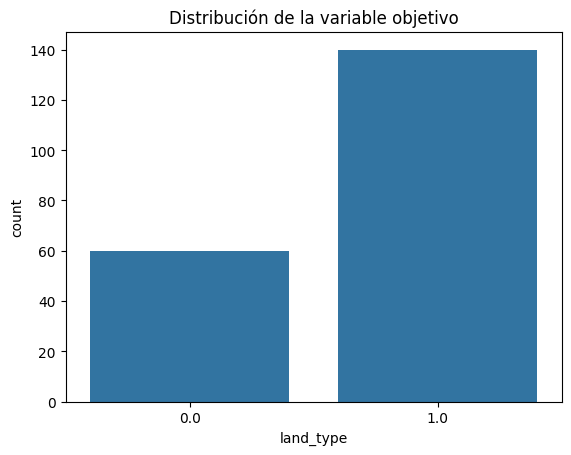

In [7]:
# Información del dataset
df.info()

# Descripción estadística del dataset
df.describe()

# Visualizar la distribución de la variable objetivo
sns.countplot(x='land_type', data=df)
plt.title('Distribución de la variable objetivo')
plt.show()


### **Dividir los datos en conjuntos de entrenamiento y prueba**.

Dividir el dataset en dos conjuntos: uno para entrenar los modelos y otro para probar su rendimiento. Utilizaremos un 70% de los datos para entrenamiento y un 30% para prueba.

In [8]:
# Separar características y variable objetivo
X = df[['latitude', 'longitude']]
y = df['land_type']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



### **Entrenar un árbol de clasificación**.

- Entrenar un modelo de árbol de clasificación utilizando las características de entrenamiento 
- Evaluar su rendimiento sobre el conjunto de prueba. 
- Analizar el reporte de clasificación y la matriz de confusión para entender el desempeño del modelo.

In [9]:
# Crear y entrenar el modelo
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_clf.fit(X_train, y_train)

# Realizar predicciones
y_pred_tree = tree_clf.predict(X_test)

# Evaluar el modelo
print("Árbol de Clasificación - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_tree))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_tree))


Árbol de Clasificación - Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.47      0.50      0.49        18
         1.0       0.78      0.76      0.77        42

    accuracy                           0.68        60
   macro avg       0.63      0.63      0.63        60
weighted avg       0.69      0.68      0.69        60

Matriz de Confusión:
[[ 9  9]
 [10 32]]



### **Entrenar un modelo de Random Forest**.

- Entrenar un modelo de Random Forest, que es un conjunto de múltiples árboles de decisión. 

- Comparar su rendimiento con el del árbol de clasificación para determinar cuál es más efectivo.

In [10]:
# Crear y entrenar el modelo. Escoger 5 arboles en el bosque 
rf_clf = RandomForestClassifier(n_estimators=5, max_depth=50)
rf_clf.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_clf.predict(X_test)

# Evaluar el modelo
print("Random Forest - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest - Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50        18
         1.0       0.79      0.79      0.79        42

    accuracy                           0.70        60
   macro avg       0.64      0.64      0.64        60
weighted avg       0.70      0.70      0.70        60

Matriz de Confusión:
[[ 9  9]
 [ 9 33]]



### **Comparar los resultados entre ambos modelos**.

- Comparar la exactitud de ambos modelos para ver cuál proporciona mejores predicciones. 
- Utilizar la métrica de exactitud, que representa el porcentaje de predicciones correctas.

In [11]:
# Comparar la exactitud de ambos modelos
accuracy_tree = accuracy_score(y_pred_tree, y_test)
accuracy_rf = accuracy_score(y_pred_rf, y_test)

print(f"Exactitud del Árbol de Clasificación: {accuracy_tree:.2f}")
print(f"Exactitud del Random Forest: {accuracy_rf:.2f}")


Exactitud del Árbol de Clasificación: 0.68
Exactitud del Random Forest: 0.70


## Exploración del rendimiento de Random Forest

Explorar cómo afectan los diferentes parámetros del modelo de Random Forest a su rendimiento. 

Utilizaremos `GridSearchCV` para encontrar la mejor combinación de parámetros.


### Parámetros de Random Forest

1.  **`n_estimators`**: Número de árboles en el bosque. Aumentar este número generalmente mejora el rendimiento hasta un cierto punto, pero también incrementa el tiempo de entrenamiento.
    
2.  **`max_depth`**: Profundidad máxima de los árboles individuales. Controlar la profundidad puede ayudar a evitar el sobreajuste.
    
3.  **`min_samples_split`**: Número mínimo de muestras requeridas para dividir un nodo. Ajustar este valor puede afectar la complejidad del modelo.
    
4.  **`min_samples_leaf`**: Número mínimo de muestras que deben estar presentes en un nodo hoja. Puede ayudar a suavizar el modelo.
    
5.  **`max_features`**: Número de características a considerar al buscar la mejor división. Puede ser un número entero, un flotante (como un porcentaje), `'auto'`, `'sqrt'`, o `'log2'`.
    
6.  **`bootstrap`**: Si se debe usar muestreo con reemplazo al construir árboles. Puede ser `True` o `False`.
    
7.  **`random_state`**: Controla la aleatoriedad del estimador. Fijar una semilla puede ayudar a obtener resultados reproducibles.

### Ajuste de Hiperparámetros con GridSearchCV

Utilizar `GridSearchCV` para explorar combinaciones de hiperparámetros y seleccionar la mejor configuración basada en la validación cruzada.

In [12]:
from sklearn.model_selection import GridSearchCV
# Definir los parámetros a explorar
param_grid = {
    # Elegir 4 valores de arboles en el bosque
    'n_estimators': [...],
    # Elegir 3 valores de profundidad maxima en cada arbol 
    'max_depth': [ ...],
    # Elegir 3 valores que indican un criterio de parada como el minimo numero de muestras requeridas para dividir un nodo
    'min_samples_split': [],
    # Elegir 3 valores que indican un criterio de parada como el minimo numero de muestras que deben estar presentes en un nodo hoja.
    'min_samples_leaf': [1, 2],
    # Elegir criterios disponibles de características a considerar al buscar la mejor división.
    'max_features': ['sqrt', 'log2'],
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=...,
                           param_grid=...,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Realizar la búsqueda de la mejor combinación de parámetros
grid_search.fit(...)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(...)

InvalidParameterError: The 'estimator' parameter of GridSearchCV must be an object implementing 'fit'. Got Ellipsis instead.

In [ ]:
# Obtener el mejor modelo
best_rf = RandomForestClassifier(...)

# Realizar predicciones con el mejor modelo
y_pred_best_rf = best_rf.predict(...)

# Evaluar el mejor modelo
print("Random Forest Optimizado - Reporte de Clasificación:")
print(classification_report(..., ...))
print("Matriz de Confusión:")
print(confusion_matrix(..., ...))

# Comparar la exactitud del modelo optimizado con el inicial
accuracy_best_rf = accuracy_score(..., ...)
print(f"Exactitud del Random Forest Optimizado: {accuracy_best_rf:.2f}")